<a href="https://colab.research.google.com/github/MdSyfulIslam/ML/blob/main/Lab07_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}"')

Saving Iris.csv to Iris.csv
User uploaded file "Iris.csv"


In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

In [4]:
iris = datasets.load_iris ()

In [5]:
print (iris.data [0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
x = pd.DataFrame(iris.data , columns=['SL','SW','PL','PW'])
y = pd.DataFrame(iris.target , columns=['Target'])

In [9]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


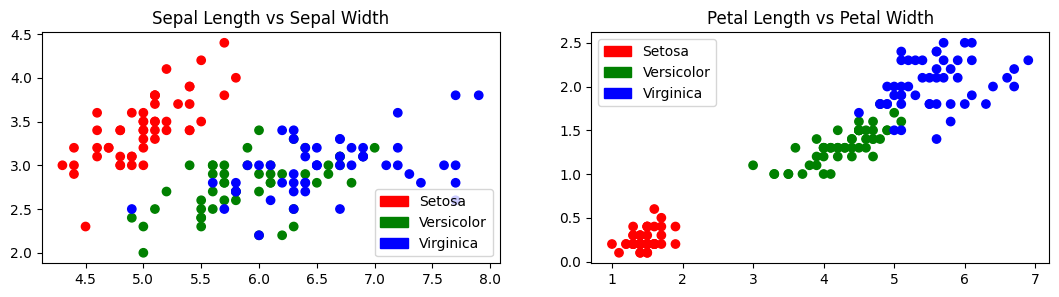

In [13]:
plt.figure(figsize =(13 ,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
plt.subplot(1, 2, 1)
plt.scatter(x['SL'], x['SW'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch , green_patch , blue_patch ])
plt.subplot (1,2,2)
plt.scatter(x['PL'], x['PW'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch , green_patch , blue_patch ])

In [15]:
iris_k_mean_model = KMeans(n_clusters =3)
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [16]:
print(iris_k_mean_model.predict(x))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [17]:
print (iris_k_mean_model.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


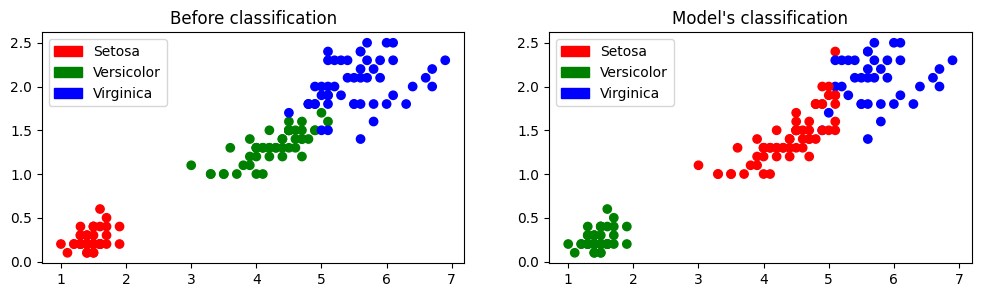

In [18]:
plt.figure(figsize =(12 ,3))
colors = np.array(['red', 'green', 'blue'])
predictedY=np.choose(iris_k_mean_model.labels_ ,[1,0,2]).astype(np.int64)
plt.subplot(1, 2, 1)
plt.scatter(x['PL'], x['PW'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch , green_patch , blue_patch ])
plt.subplot(1, 2, 2)
plt.scatter(x['PL'], x['PW'], c=colors[predictedY ])
plt.title("Model's classification")
plt.legend(handles=[red_patch , green_patch , blue_patch ])

In [19]:
sm.accuracy_score(predictedY , y['Target'])

0.24

In [20]:
sm.confusion_matrix(predictedY , y['Target'])

array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]])